# Taller 2

* Tomás Otéro
* Adriana Velásquez

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from sympy import lambdify

### 1. Derivación: Problema 8 

Es posible construir una aproximación de orden O(h^2) para la derivada progresiva. Para
tal propósito, se escribe el polinomio de interpolación de grado 2 para el conjunto soporte Ω = {(x0, f(x0)),(x1, f(x1)),(x2, f(x2))}, y posteriormente se calcula la derivada de este
polinomio.

### 2. Raíces de Polinomios: Problema 5

(SymPy) Calcular todas las ra´ıces reales de los primeros 20 polinomios de Laguerre.

In [143]:


#Definir el polinomio n de laguerre
def laguerre_Pol(n):
    x = sym.Symbol('x',real=True, positive=True)
    Der = sym.exp(-x)*x**n
    L = (sym.exp(x)/sym.factorial(n))*sym.diff(Der,x,n,evaluate=True)
    return L

def Derivative(f,x,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)


#Definir las raices del polinomio n de laguerre

def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5):
    
    error = 1
    it = 0
    
    while error > precision and it <= itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            
            error = np.abs(f(xn)/df(f,xn))
            
            #print(error)
            
        except ZeroDivisionError:
            
            print('Division por cero')
            
        it += 1
        xn = xn1
    
    if it == itmax:
        False
    else:
        return xn
    
    
def GetAllRoots(n, x,tolerancia=8):
    
    Roots = np.array([])
    x_sym = sym.Symbol('x', real=True, positive=True)
    Function = lambdify(x_sym, laguerre_Pol(n))
    
    for i in x:
        
        root = GetNewtonRaphson(Function,Derivative,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots

x = np.linspace(-1,4,1000)

print('Polinomio 0')
print('1' )
print('Sus raices son: No tiene raices' )
print('  ')

for i in range(29):
    print('Polinomio ', i+1 )
    #print('$', sym.latex(laguerre_Pol(i+1)), '$')
    print('Sus raices son: ')
    print((GetAllRoots(i+1, x)))
    print('  ')

Polinomio 0
1
Sus raices son: No tiene raices
  
Polinomio  1
Sus raices son: 
[1.]
  
Polinomio  2
Sus raices son: 
[0.58578644 3.41421356]
  
Polinomio  3
Sus raices son: 
[0.41577456 2.29428036 6.28994508]
  
Polinomio  4
Sus raices son: 
[0.32254769 1.7457611  4.5366203  9.39507091]
  
Polinomio  5
Sus raices son: 
[ 0.26356032  1.41340306  3.59642577  7.08581001 12.64080084]
  
Polinomio  6
Sus raices son: 
[ 0.2228466   1.1889321   2.99273633  5.77514357  9.83746742 15.98287398]
  
Polinomio  7
Sus raices son: 
[ 0.19304368  1.0266649   2.56787674  4.90035308  8.18215344 12.73418029
 19.39572786]
  
Polinomio  8
Sus raices son: 
[ 0.17027963  0.90370178  2.25108663  4.26670017  7.0459054  10.75851601
 15.74067864 22.86313174]
  
Polinomio  9
Sus raices son: 
[ 0.15232223  0.80722002  2.00513516  3.78347397  6.20495678  9.37298525
 13.46623691 18.83359779 26.37407189]
  
Polinomio  10
Sus raices son: 
[ 0.13779347  0.72945455  1.8083429   3.4014337   5.55249614  8.33015275
 11.843

### 3. Interpolación de Lagrange

* **Problema 1:** (Theoretical) Demuestre que el polinomio interpolador es único

* **Problema 2:** En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones
en metros respecto al arma homicida (tome ~g = −9.8 m/s2 ˆj):
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesRefoParabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección. Rpta:
V0 = 10 m/s y θ = 20◦
. Hint: Encuentre el termino lineal y cuadrático de la interpolación
y compare con la ecuaci´on de trayectoria de la bala.

El ángulo es:  19.999999999999986 °


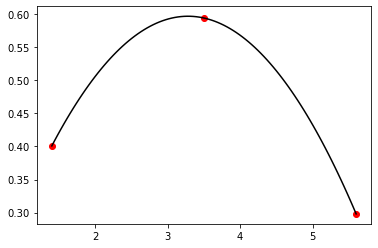

In [142]:
X = np.array([])
Y = np.array([])

file = open('Datos/Datos.txt', 'r')

for row in file:

    row = row.split(',')
    X= np.append(X, float(row[0]))
    Y= np.append(Y, float(row[1]))
    

def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

x = np.linspace(X[0],X[-1],100)
y = Interpolate(x,X,Y)

plt.scatter(X,Y,marker='o',color='r')
plt.plot(x,y,color='k')

x = sym.Symbol('x',real=True)

f = Interpolate(x,X,Y)
f = sym.simplify(f)

df = sym.diff(f,x)
m = df.subs(x, 0)
m = np.array(m, dtype=float)


theta = np.degrees(np.arctan(m))
     
print('El ángulo es: ', theta, '°')